# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## 1. Coleta de Dados

# Coletando dados:

In [2]:
CAMINHO_CSV = '../data/raw/Orange_Quality_Data.csv'
with open(CAMINHO_CSV, 'r') as arquivo:
    leitor = csv.reader(arquivo)
    print(next(leitor))

['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color', 'Variety', 'Blemishes (Y/N)', 'Quality (1-5)']


# Criando tabela e iniciando análises básicas:

In [3]:
df = pd.read_csv(CAMINHO_CSV)

In [4]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [25]:
brix = df.loc[df['Brix (Sweetness)'] >= 13,['Ripeness (1-5)', 'Brix (Sweetness)']]
display(brix)

,Ripeness (1-5),Brix (Sweetness)
2,5.0,14.0
7,4.5,13.5
11,3.0,14.8
15,5.0,14.5
17,1.0,14.1
...,...,...
224,5.0,13.0
225,3.0,14.6
226,2.0,14.5
230,2.0,15.6


# Filtragem dos dados: Busca por valores nulos

In [8]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [19]:
quantidade_valores_unicos = df['Variety'].nunique()
print('Valores diferentes dentro da variável:', quantidade_valores_unicos)

Valores diferentes dentro da variável: 24


In [28]:
valores_unicos = df['Variety'].unique()
quantidade_valores_unicos = len(valores_unicos)
print("Valores diferentes dentro da variavel:", quantidade_valores_unicos)
print("Os valores:", valores_unicos)

Valores diferentes dentro da variavel: 24
Os valores: ['Valencia' 'Navel' 'Cara Cara' 'Blood Orange' 'Hamlin' 'Tangelo (Hybrid)'
 'Murcott (Hybrid)' 'Moro (Blood)' 'Jaffa' 'Clementine' 'Washington Navel'
 'Star Ruby' 'Tangerine' 'Ambiance' 'California Valencia'
 'Honey Tangerine' 'Navel (Late Season)' 'Clementine (Seedless)' 'Temple'
 'Minneola (Hybrid)' 'Satsuma Mandarin' 'Midsweet (Hybrid)'
 'Navel (Early Season)' 'Ortanique (Hybrid)']


# Analise Grafica

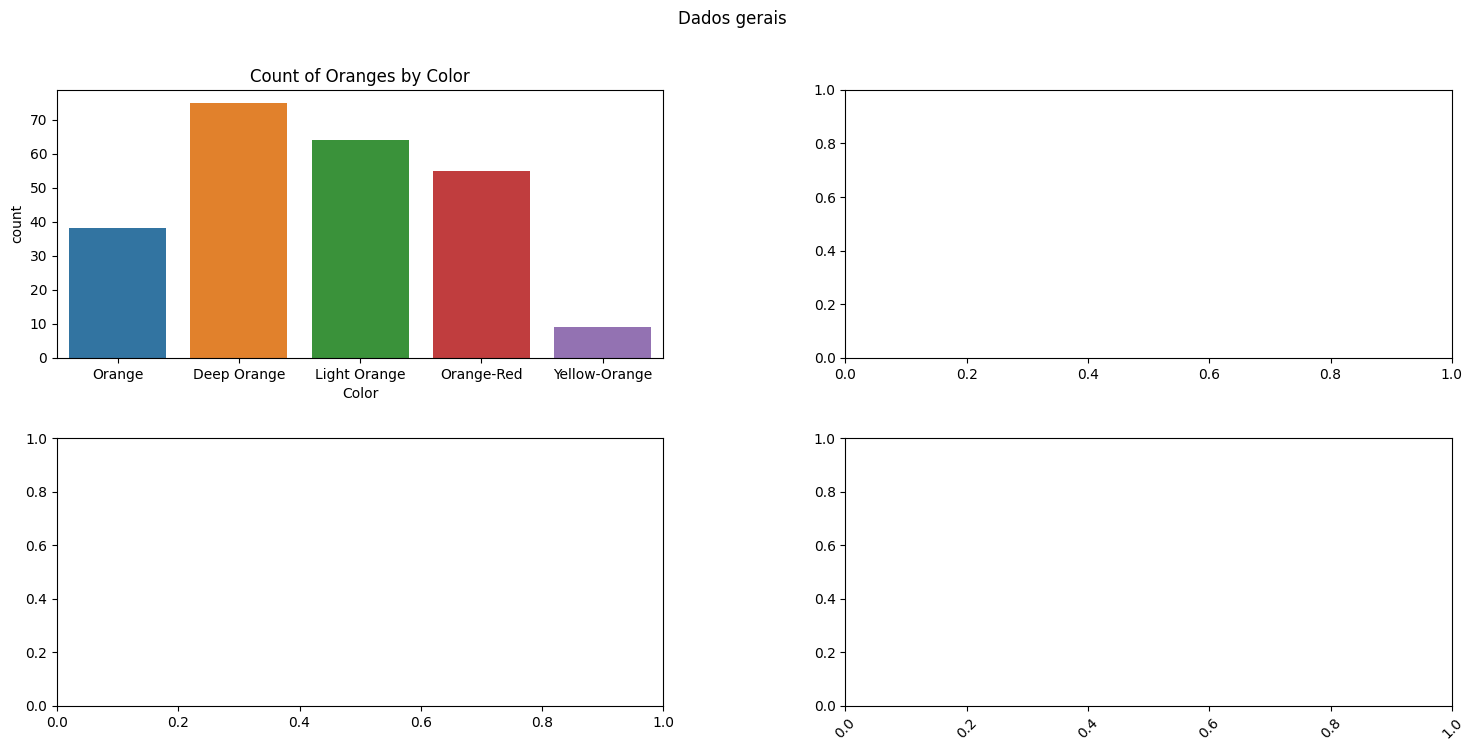

In [10]:
fig, axs = plt.subplots(2,2, figsize = (18,8))
plt.suptitle('Dados gerais')
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.countplot(x="Color", data=df, ax = axs[0,0])
axs[0,0].set_title("Count of Oranges by Color")  # Será que a cor da laranja tem relação com algum fator?
plt.xticks(rotation=45)
plt.show()

# dados matplotlib and Seaborn

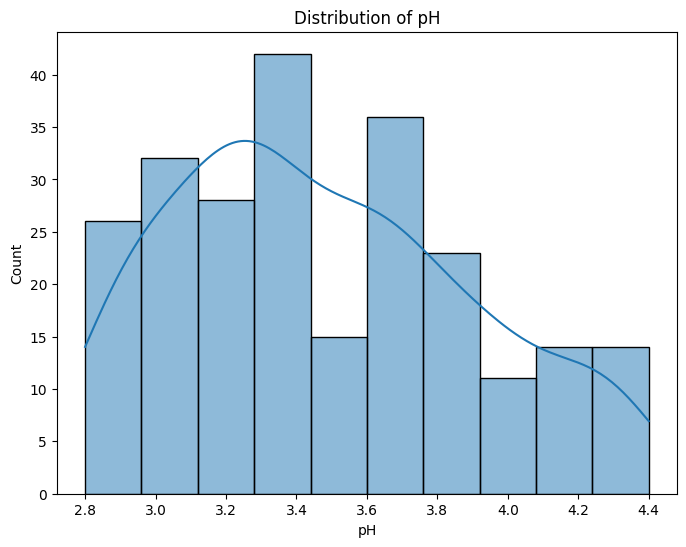

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df["pH (Acidity)"], bins=10, kde=True)
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.show()

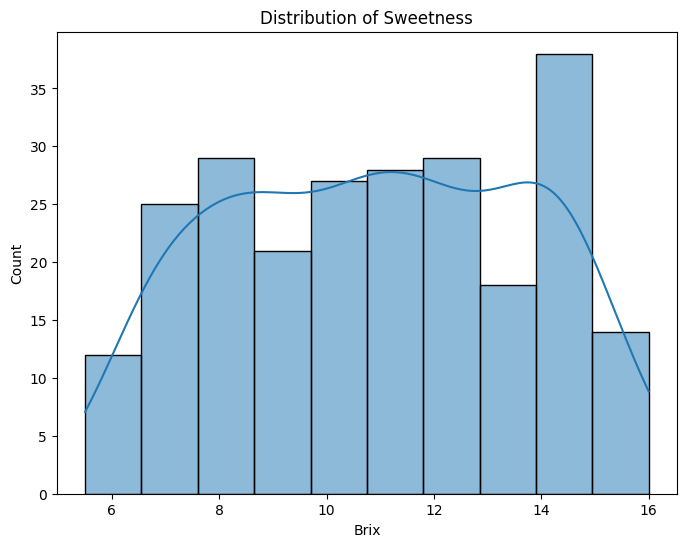

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Brix (Sweetness)"], bins=10, kde=True)
plt.title("Distribution of Sweetness")
plt.xlabel("Brix")
plt.show()

# dados Pandas e matplotlib

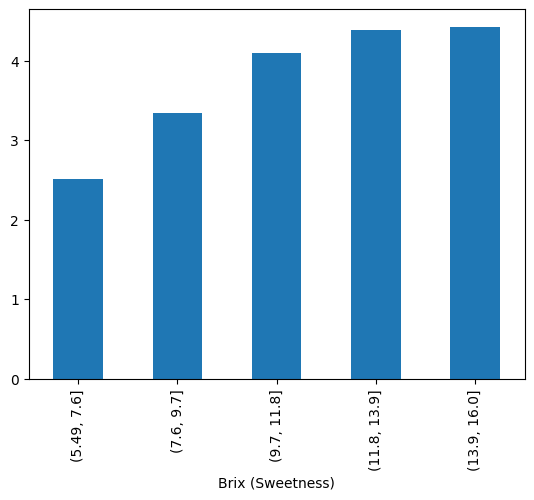

In [13]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=5))['Quality (1-5)'].mean().plot(kind='bar')
plt.show()

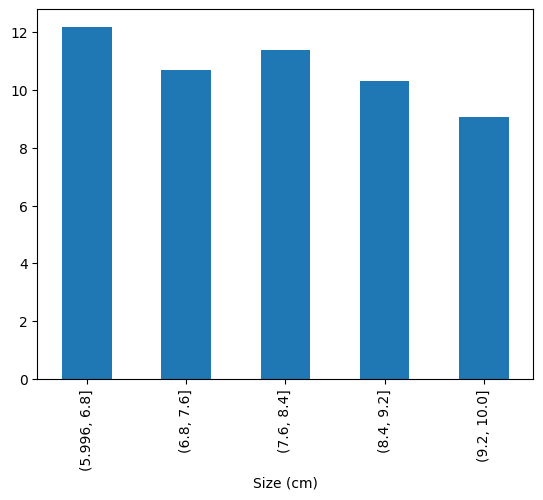

In [14]:
df.groupby(pd.cut(df['Size (cm)'], bins=5))['Brix (Sweetness)'].mean().plot(kind='bar')
plt.show()

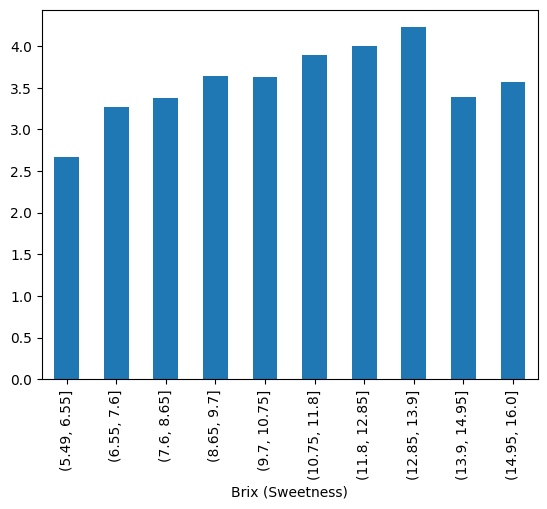

In [15]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['Ripeness (1-5)'].mean().plot(kind='bar')
plt.show()

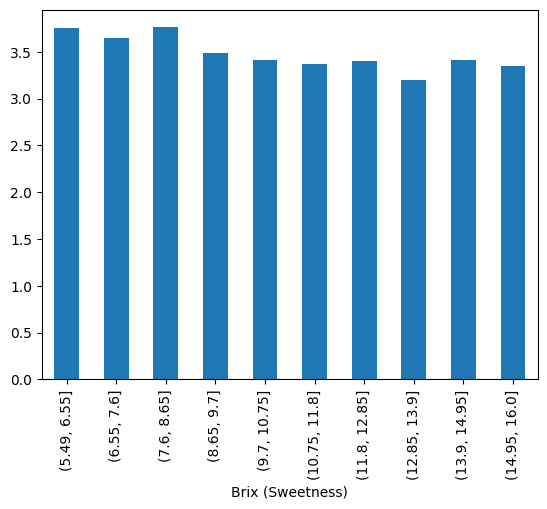

In [16]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['pH (Acidity)'].mean().plot(kind='bar')
plt.show()

## 2. Descrição dos dados

## 2.1 Dicionário de dados

In [17]:
dicionario = pd.DataFrame([
    {
        "variavel": "Size",
        "descricao": "tamanho",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Weigth",
        "descricao": "Peso",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Brix",
        "descricao": "Nível de doçura em Brix",
        "tipo":"qualitativa",
        "subtipo":"continua"
    },{
        "variavel": "pH",
        "descricao": "Nível de acidez (pH)",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Softness",
        "descricao": "Classificação de suavidade (1-5)",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "HarvestTime",
        "descricao": "Dias desde a colheita",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Ripeness",
        "descricao": "Maturação",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Color",
        "descricao": "Cor da fruta",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Variety",
        "descricao": "Variedade Laranja",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Blemishes",
        "descricao": "Presença de manchas",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Quality",
        "descricao": "Qualidade",
        "tipo":"quantitativa",
        "subtipo":"continua"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,Size,tamanho,qualitativa,nominal
1,Weigth,Peso,qualitativa,nominal
2,Brix,Nível de doçura em Brix,qualitativa,continua
3,pH,Nível de acidez (pH),qualitativa,nominal
4,Softness,Classificação de suavidade (1-5),qualitativa,nominal
5,HarvestTime,Dias desde a colheita,qualitativa,nominal
6,Ripeness,Maturação,qualitativa,nominal
7,Color,Cor da fruta,quantitativa,continua
8,Variety,Variedade Laranja,quantitativa,continua
9,Blemishes,Presença de manchas,quantitativa,continua


## 2. Perguntas de partida e hipóteses

- O que está relacionado com a doçura?
- O que torna a fruta mais doce?

## 3. Insights

- A qualidade da Laranjá está diretamente proporicional a sua doçura.
- Talvez tenha alguma relação entre a maturação e a doçura, segundo o gráfico que correlaciona as 2 colunas.
